# Stock Price Forcasting Using Tensorflow - V2

In [30]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Micellaneous Functions

In [31]:
def drop_columns(hist):
    return hist.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])

def set_size(num, df):
    return df.shape[0]-num

## Collecting the data

In [32]:
data = yf.Ticker('MSFT')
df = drop_columns(data.history(start='2010-01-01'))
n = len(df)
df

,Close
Date,
2010-01-04,24.17
2010-01-05,24.18
2010-01-06,24.03
2010-01-07,23.78
2010-01-08,23.94
...,...
2020-09-21,202.54
2020-09-22,207.42
2020-09-23,200.59


## Splitting the data

In [33]:
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

train_df

,Close
Date,
2010-01-04,24.17
2010-01-05,24.18
2010-01-06,24.03
2010-01-07,23.78
2010-01-08,23.94
...,...
2017-06-30,65.56
2017-07-03,64.84
2017-07-05,65.71


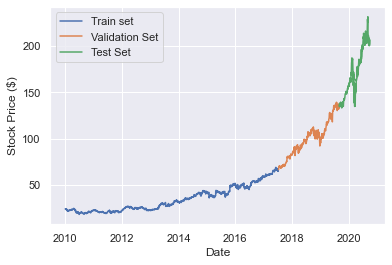

In [34]:
plt.plot(train_df['Close'])
plt.plot(val_df['Close'])
plt.plot(test_df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend(['Train set', 'Validation Set', 'Test Set'])
plt.show()

## Pre-processing the data and creating a baseline with simple RNN

In [48]:
import tensorflow as tf

features = ['Close']

np.random.seed(42)
tf.random.set_seed(42)

# Might need to create a TensorFlow dataset in order to get it to behave properly
train_df.index = range(1, len(train_df)+1)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(train_df[features].values, tf.float64),
            tf.cast(train_df.index.values, tf.int8)
        )
    )
)

val_df.index = range(1, len(val_df)+1) 
val_df.index += len(train_df)

validation_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(val_df[features].values, tf.float64),
            tf.cast(val_df.index.values, tf.int8)
        )
    )
)

training_dataset, validation_dataset

(<TensorSliceDataset shapes: ((1,), ()), types: (tf.float64, tf.int8)>,
 <TensorSliceDataset shapes: ((1,), ()), types: (tf.float64, tf.int8)>)

In [58]:
# Creating simple RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(1, batch_input_shape=[None, 1892, 1])
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(training_dataset, epochs=20, validation_data=validation_dataset)
history

Epoch 1/20


ValueError: in user code:

    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    d:\Coding\ml_forecasting\forecast\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:176 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_19 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [1, 1]
